<h3>Importing the Data

In [1]:
# The code was removed by Watson Studio for sharing.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:

body = client_5e257c6d7253436b8386d986dead5ac0.get_object(Bucket='housepriceskaggle-donotdelete-pr-253ugsl323ic1h',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test1 = pd.read_csv(body)
df_test1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
#set option to see all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#count missing values percentage in each column
missing1 = (df_train1.isnull().sum() / len(df_train1))*100

#put a filter to only show columns with missing value
missing1 = missing1[missing1 > 0].sort_values()
missing1

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

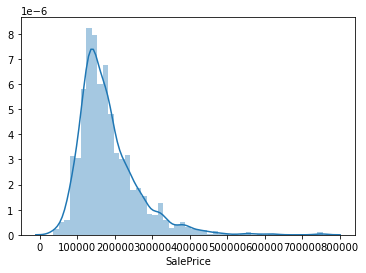

In [4]:
import seaborn as sns

# plot a distribution plot of SalePrice column (our target)
sns.distplot(df_train1['SalePrice'])

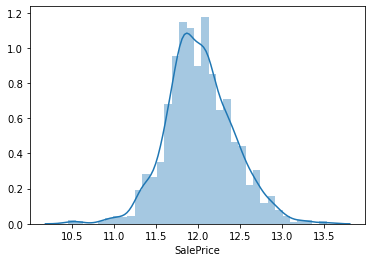

In [5]:
import numpy as np


#using the log method to scale and see distribution again.
target1 = np.log(df_train1['SalePrice'])
sns.distplot(target1)

In [6]:
#finding numerical features only
numeric_data = df_train1.select_dtypes(include = [np.number])

#finding categorical features only
categorical_data = df_train1.select_dtypes(exclude = [np.number])

In [7]:
numeric_data.shape

(1460, 38)

In [8]:
categorical_data.shape

(1460, 43)

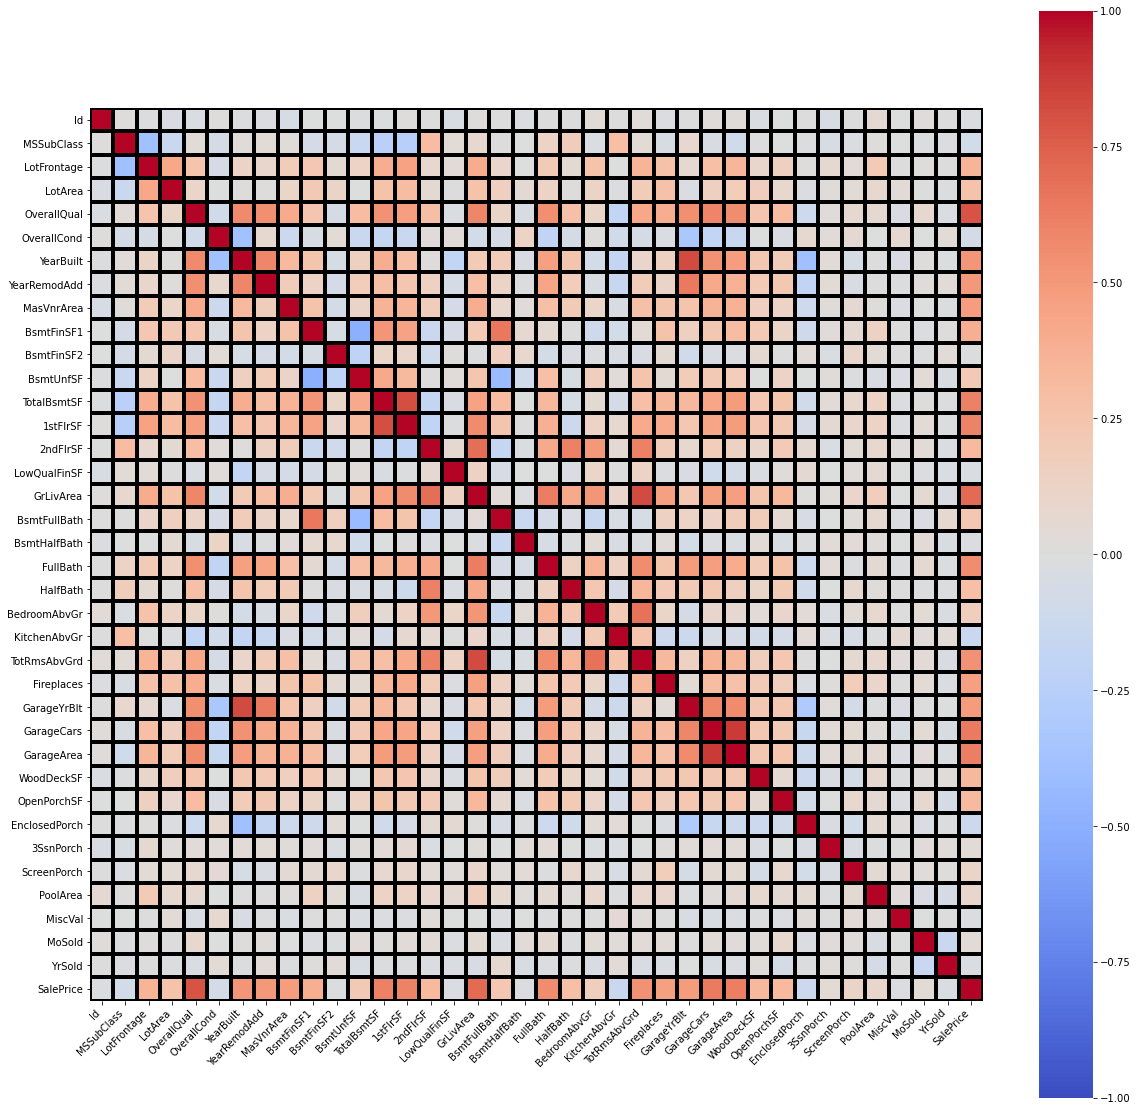

In [9]:
#plot a correlation matrix
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(20,20))
corr = numeric_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    linewidths=3,
    linecolor='black'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

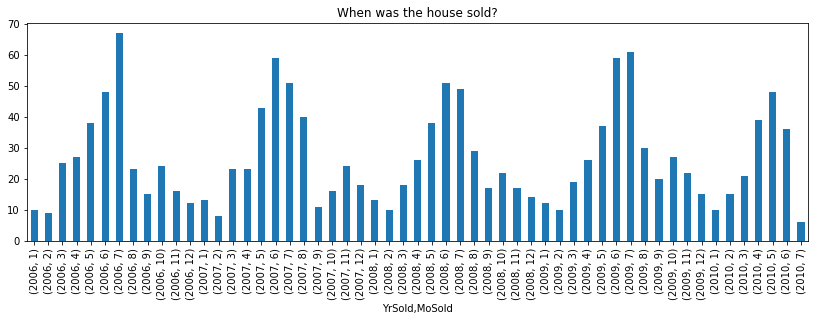

In [10]:
%matplotlib inline

df_train1.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title ("When was the house sold?")
plt.show()

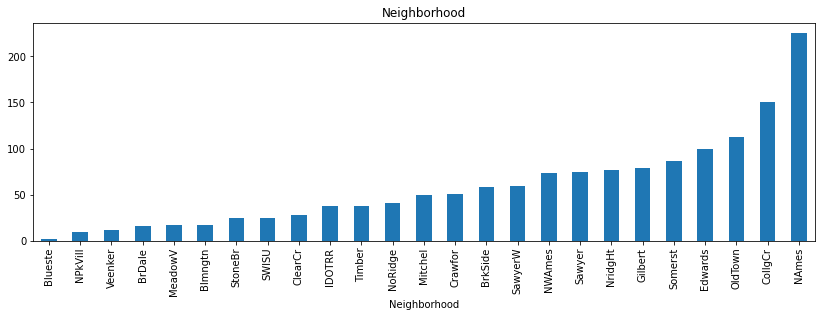

In [11]:
df_train1.groupby(['Neighborhood']).Id.count().sort_values().plot(kind='bar', figsize=(14,4))

plt.title ("Neighborhood")
plt.show()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/

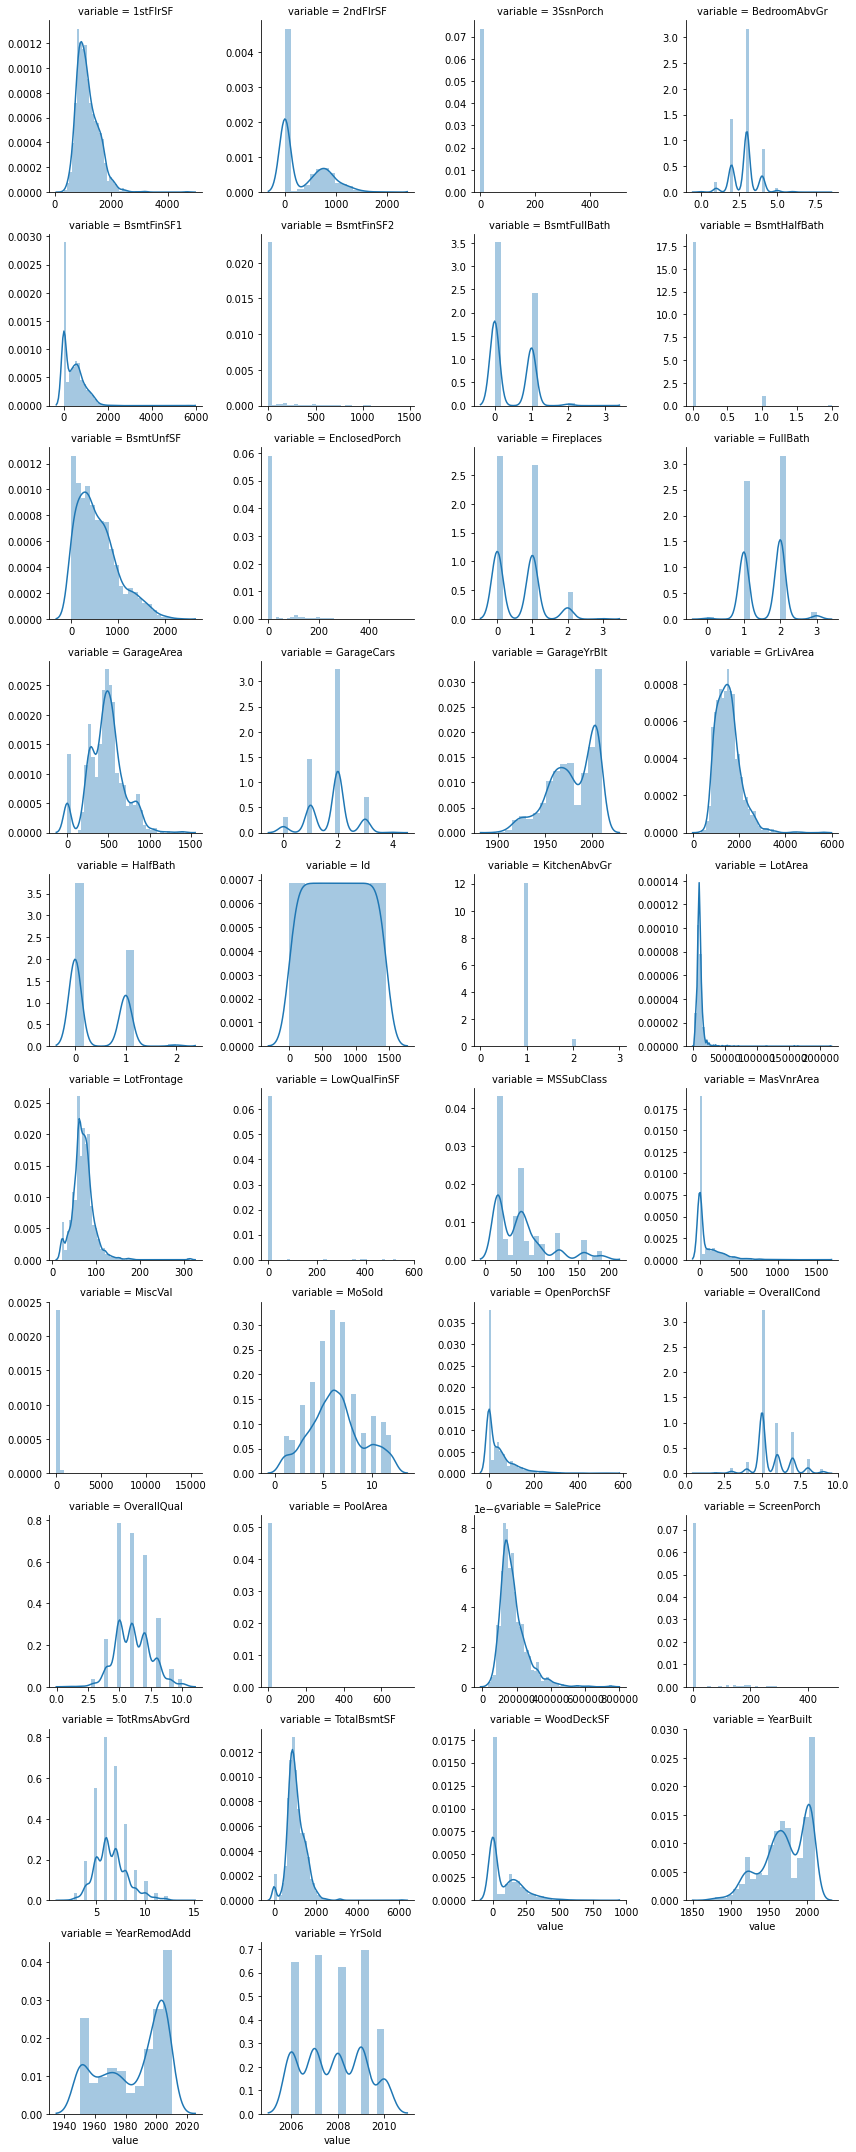

In [12]:
#distribution of all numerical features


f = pd.melt(df_train1, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g= g.map(sns.distplot, 'value')

#graphs with separate bars are numerical data that belongs as categorical 

In [13]:
#converting the numerical data that belongs as categorical
df_train1['MSSubClass'] = df_train1.MSSubClass.apply(lambda x: str(x))
df_train1['MoSold'] = df_train1.MoSold.apply(lambda x: str(x))
df_train1['YrSold'] = df_train1.YrSold.apply(lambda x: str(x))

df_test1['MSSubClass'] = df_test1.MSSubClass.apply(lambda x: str(x))
df_test1['MoSold'] = df_test1.MoSold.apply(lambda x: str(x))
df_test1['YrSold'] = df_test1.YrSold.apply(lambda x: str(x))

In [14]:
#finding numerical features only
numeric_data = df_train1.select_dtypes(include = [np.number])
numeric_data_test = df_test1.select_dtypes(include = [np.number])

#finding categorical features only
categorical_data = df_train1.select_dtypes(exclude = [np.number])
categorical_data_test = df_test1.select_dtypes(exclude = [np.number])

In [45]:
categorical_data.shape

(1460, 26)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


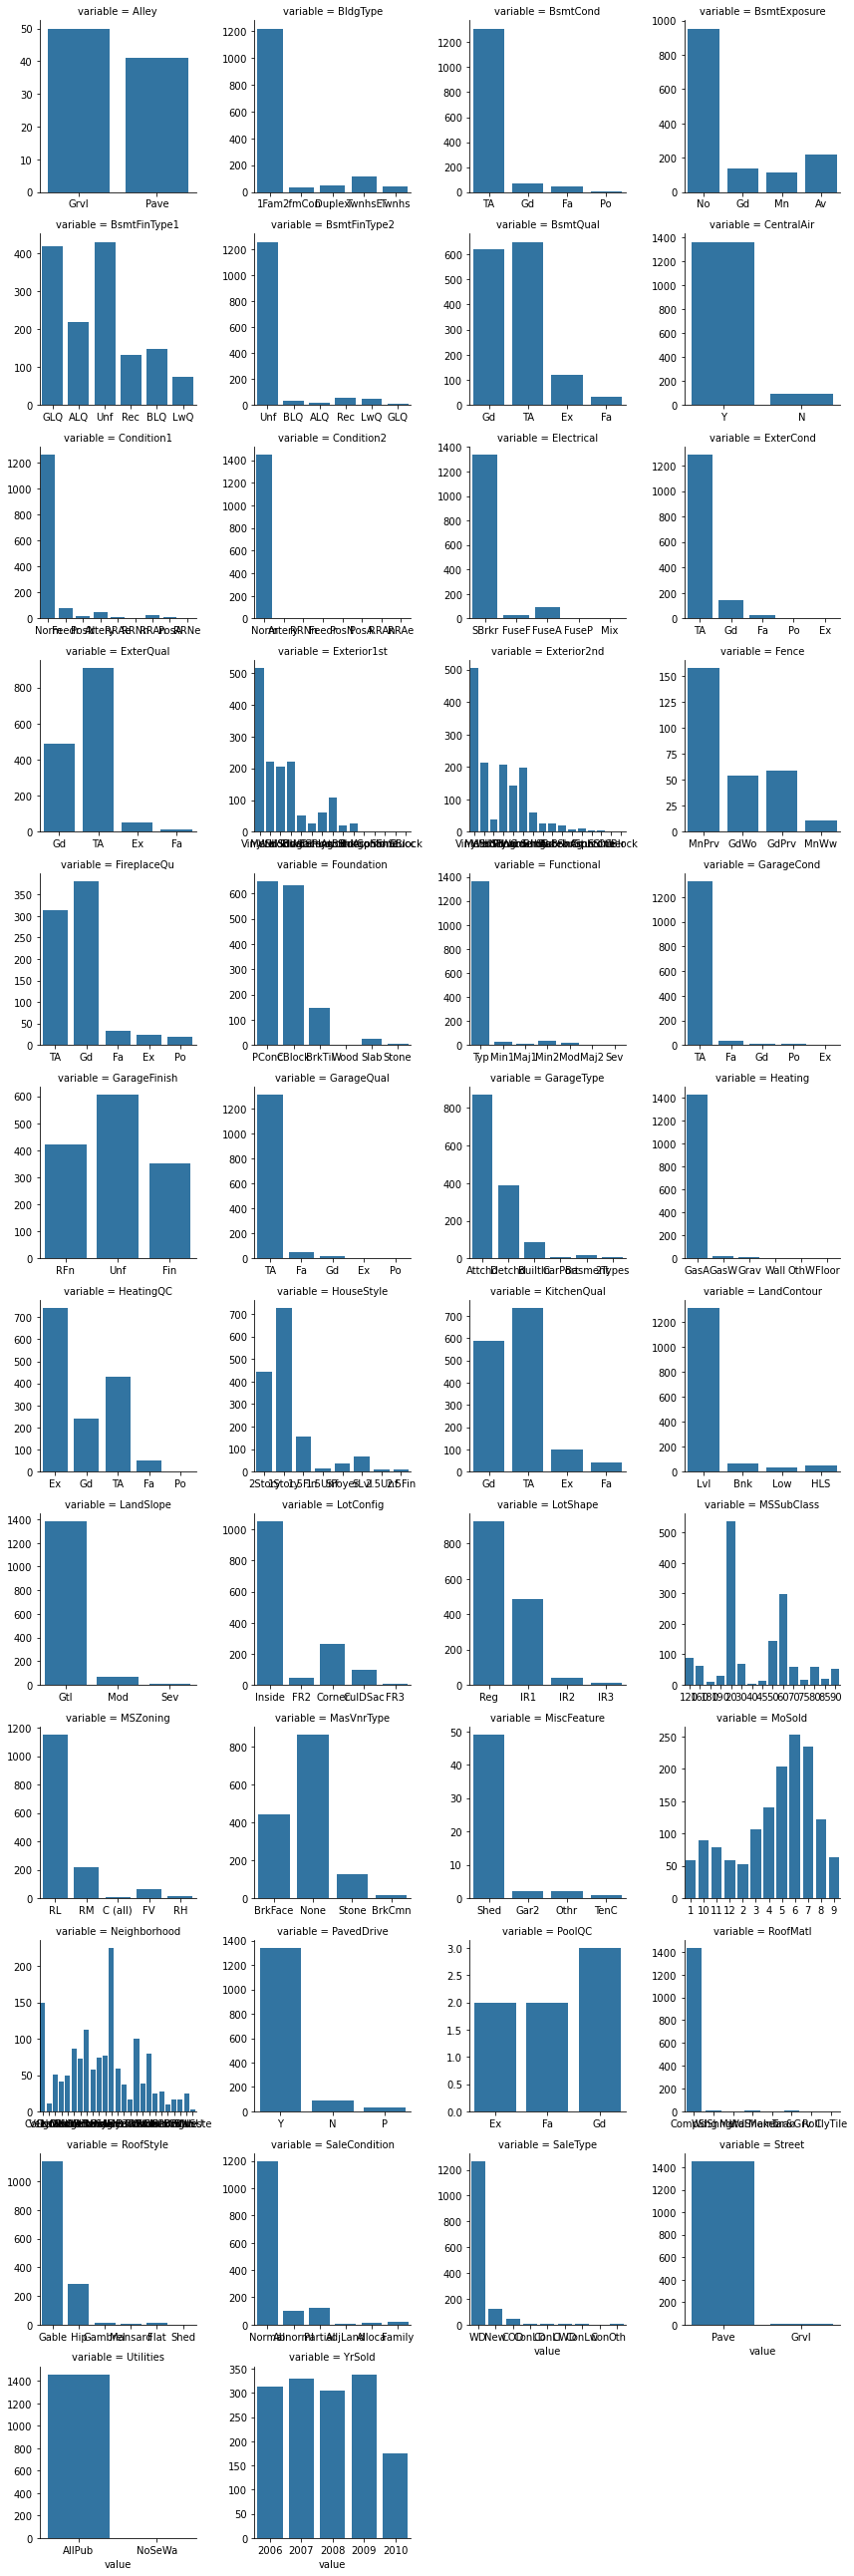

In [16]:
#plot the count of features in categorical data


f = pd.melt(df_train1, value_vars=sorted(categorical_data))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g= g.map(sns.countplot, 'value')

<h3> Converting categorical features to numerical(rating type of feature)

In [17]:
#We will convert all cateogrical 
df_train1['Alley'] = df_train1['Alley'].replace('Grvl', 1).replace('Pave',2)
df_test1['Alley'] = df_test1['Alley'].replace('Grvl', 1).replace('Pave',2)


In [17]:
#LotShape
df_train1['LotShape'] = df_train1['LotShape'].replace('Reg', 1).replace('IR1',2).replace('IR2', 3).replace('IR3',4)
df_test1['LotShape'] = df_test1['LotShape'].replace('Reg', 1).replace('IR1',2).replace('IR2', 3).replace('IR3',4)

#LandContour
df_train1['LandContour'] = df_train1['LandContour'].replace('Lvl', 1).replace('Bnk',2).replace('Low', 3).replace('HLS',4)
df_test1['LandContour'] = df_test1['LandContour'].replace('Lvl', 1).replace('Bnk',2).replace('Low', 3).replace('HLS',4)

#Utilities
df_train1['Utilities'] = df_train1['Utilities'].replace('AllPub', 1).replace('NoSeWa',2)
df_test1['Utilities'] = df_test1['Utilities'].replace('AllPub', 1).replace('NoSeWa',2)

#LandSlope
df_train1['LandSlope'] = df_train1['LandSlope'].replace('Gtl', 1).replace('Mod',2).replace('Sev', 3)
df_test1['LandSlope'] = df_test1['LandSlope'].replace('Gtl', 1).replace('Mod',2).replace('Sev', 3)

#ExterQual
df_train1['ExterQual'] = df_train1['ExterQual'].replace('Gd', 1).replace('TA',2).replace('Ex', 3).replace('Fa',4)
df_test1['ExterQual'] = df_test1['ExterQual'].replace('Gd', 1).replace('TA',2).replace('Ex', 3).replace('Fa',4)

#ExterCond
df_train1['ExterCond'] = df_train1['ExterCond'].replace('TA', 1).replace('Gd',2).replace('Fa', 3).replace('Po',4).replace('Ex',5)
df_test1['ExterCond'] = df_test1['ExterCond'].replace('TA', 1).replace('Gd',2).replace('Fa', 3).replace('Po',4).replace('Ex',5)

#BsmtQual
df_train1['BsmtQual'] = df_train1['BsmtQual'].replace('Gd', 1).replace('TA',2).replace('Ex', 3).replace('Fa',4)
df_test1['BsmtQual'] = df_test1['BsmtQual'].replace('Gd', 1).replace('TA',2).replace('Ex', 3).replace('Fa',4)

#BsmtCond
df_train1['BsmtCond'] = df_train1['BsmtCond'].replace('TA', 1).replace('Gd',2).replace('Fa', 3).replace('Po',4)
df_test1['BsmtCond'] = df_test1['BsmtCond'].replace('TA', 1).replace('Gd',2).replace('Fa', 3).replace('Po',4)

#BsmtExposure
df_train1['BsmtExposure'] = df_train1['BsmtExposure'].replace('No', 1).replace('Gd',2).replace('Mn', 3).replace('Av',4)
df_test1['BsmtExposure'] = df_test1['BsmtExposure'].replace('No', 1).replace('Gd',2).replace('Mn', 3).replace('Av',4)

#BsmtFinType1
df_train1['BsmtFinType1'] = df_train1['BsmtFinType1'].replace('GLQ', 1).replace('ALQ',2).replace('Unf', 3).replace('Rec',4).replace('BLQ',5).replace('LwQ',6)
df_test1['BsmtFinType1'] = df_test1['BsmtFinType1'].replace('GLQ', 1).replace('ALQ',2).replace('Unf', 3).replace('Rec',4).replace('BLQ',5).replace('LwQ',6)

#BsmtFinType2
df_train1['BsmtFinType2'] = df_train1['BsmtFinType2'].replace('Unf', 1).replace('BLQ',2).replace('ALQ', 3).replace('Rec',4).replace('LwQ',5).replace('GLQ',6)
df_test1['BsmtFinType2'] = df_test1['BsmtFinType2'].replace('Unf', 1).replace('BLQ',2).replace('ALQ', 3).replace('Rec',4).replace('LwQ',5).replace('GLQ',6)

#HeatingQC
df_train1['HeatingQC'] = df_train1['HeatingQC'].replace('Ex', 1).replace('Gd',2).replace('TA', 3).replace('Fa',4).replace('Po',5)
df_test1['HeatingQC'] = df_test1['HeatingQC'].replace('Ex', 1).replace('Gd',2).replace('TA', 3).replace('Fa',4).replace('Po',5)

#KitchenQual
df_train1['KitchenQual'] = df_train1['KitchenQual'].replace('Gd', 1).replace('TA',2).replace('Ex', 3).replace('Fa',4)
df_test1['KitchenQual'] = df_test1['KitchenQual'].replace('Gd', 1).replace('TA',2).replace('Ex', 3).replace('Fa',4)

#Functional
df_train1['Functional'] = df_train1['Functional'].replace('Typ', 1).replace('Min2',2).replace('Min1', 3).replace('Mod',4).replace('Maj1',5).replace('Maj2',6).replace('Sev',7)
df_test1['Functional'] = df_test1['Functional'].replace('Typ', 1).replace('Min2',2).replace('Min1', 3).replace('Mod',4).replace('Maj1',5).replace('Maj2',6).replace('Sev',7)

#FirePlaceQu
df_train1['FireplaceQu'] = df_train1['FireplaceQu'].replace('TA', 1).replace('Gd',2).replace('Fa', 3).replace('Ex',4).replace('Po',5)
df_test1['FireplaceQu'] = df_test1['FireplaceQu'].replace('TA', 1).replace('Gd',2).replace('Fa', 3).replace('Ex',4).replace('Po',5)

#GarageFinish
df_train1['GarageFinish'] = df_train1['GarageFinish'].replace('RFn', 1).replace('Unf',2).replace('Fin', 3)
df_test1['GarageFinish'] = df_test1['GarageFinish'].replace('RFn', 1).replace('Unf',2).replace('Fin', 3)

#GarageQuality
df_train1['GarageQual'] = df_train1['GarageQual'].replace('TA', 1).replace('Fa',2).replace('Gd', 3).replace('Ex',4).replace('Po',5)
df_test1['GarageQual'] = df_test1['GarageQual'].replace('TA', 1).replace('Fa',2).replace('Gd', 3).replace('Ex',4).replace('Po',5)

#GarageCond
df_train1['GarageCond'] = df_train1['GarageCond'].replace('TA', 1).replace('Fa',2).replace('Gd', 3).replace('Po',4).replace('Ex',5)
df_test1['GarageCond'] = df_test1['GarageCond'].replace('TA', 1).replace('Fa',2).replace('Gd', 3).replace('Po',4).replace('Ex',5)

#PavedDrive
df_train1['PavedDrive'] = df_train1['PavedDrive'].replace('Y', 1).replace('N',2).replace('P', 3)
df_test1['PavedDrive'] = df_test1['PavedDrive'].replace('Y', 1).replace('N',2).replace('P', 3)

#PoolQC
df_train1['PoolQC'] = df_train1['PoolQC'].replace('Ex', 1).replace('Fa',2).replace('Gd', 3)
df_test1['PoolQC'] = df_test1['PoolQC'].replace('Ex', 1).replace('Fa',2).replace('Gd', 3)



In [20]:
df_train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,1,1,1,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,1,1,PConc,1.0,1.0,1.0,1.0,706,1.0,0,150,856,GasA,1,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,NaN,Attchd,2003.0,1.0,2,548,1.0,1.0,1,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,1,1,1,FR2,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,2,1,CBlock,1.0,1.0,2.0,2.0,978,1.0,0,284,1262,GasA,1,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,1.0,Attchd,1976.0,1.0,2,460,1.0,1.0,1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,2,1,1,Inside,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,1,1,PConc,1.0,1.0,3.0,1.0,486,1.0,0,434,920,GasA,1,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,1.0,Attchd,2001.0,1.0,2,608,1.0,1.0,1,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,2,1,1,Corner,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,2,1,BrkTil,2.0,2.0,1.0,2.0,216,1.0,0,540,756,GasA,2,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,2.0,Detchd,1998.0,2.0,3,642,1.0,1.0,1,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,2,1,1,FR2,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,1,1,PConc,1.0,1.0,4.0,1.0,655,1.0,0,490,1145,GasA,1,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,1.0,Attchd,2000.0,1.0,3,836,1.0,1.0,1,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
cat_to_num = ['Alley', 'BldgType', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']

In [22]:
df_train1[cat_to_num]= df_train1[cat_to_num].fillna(0)
df_test1[cat_to_num]= df_test1[cat_to_num].fillna(0)


In [23]:
#finding numerical features only
numeric_data = df_train1.select_dtypes(include = [np.number])
numeric_data_test= df_test1.select_dtypes(include = [np.number])

#finding categorical features only
categorical_data = df_train1.select_dtypes(exclude = [np.number])
categorical_data_test = df_test1.select_dtypes(exclude = [np.number])

In [24]:
categorical_data.shape

(1460, 26)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


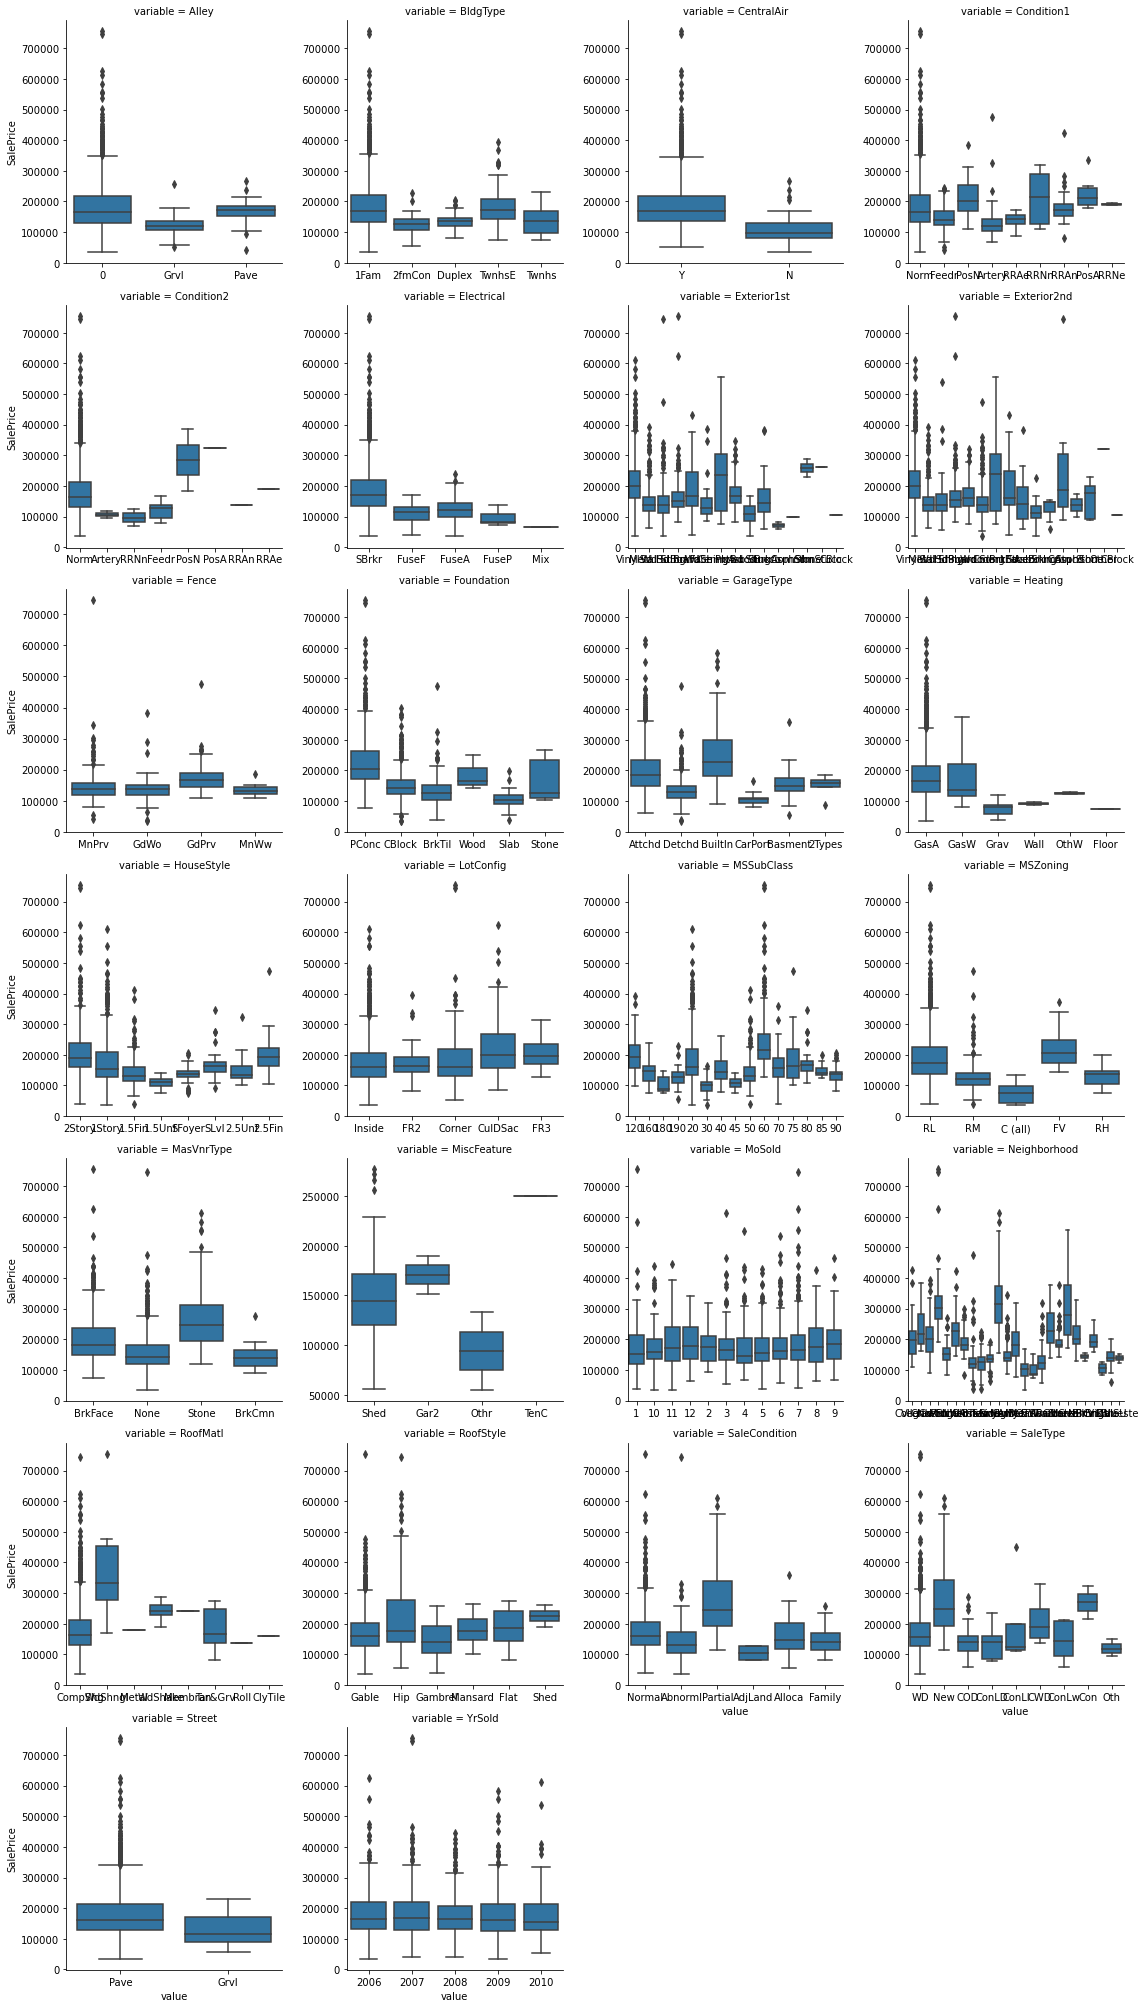

In [25]:
#plot the count of features in categorical data


f = pd.melt(df_train1, value_vars=sorted(categorical_data), id_vars=['SalePrice'])
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False, size=4)
g= g.map(sns.boxplot, 'value', 'SalePrice')

In [29]:
import scipy.stats
cat_features = categorical_data.columns
df_train1[cat_features] = df_train1[cat_features].fillna('Missing')

#ANOVA#

anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df_train1[cat].unique():
        group_prices.append(df_train1[df_train1[cat] == group]['SalePrice'].values)
    f,p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature', 'f', 'p']]
anova.sort_values('p', inplace = True)

In [30]:
anova

,feature,f,p
5,Neighborhood,71.784865,1.558600e-225
15,Foundation,100.253851,5.791895e-91
19,GarageType,80.379992,6.117026e-87
0,MSSubClass,33.732076,8.662166e-79
14,MasVnrType,84.672201,1.054025e-64
25,SaleCondition,45.578428,7.988268e-44
12,Exterior1st,18.611743,2.586089e-43
13,Exterior2nd,17.500840,4.842186e-43
24,SaleType,28.863054,5.039767e-42
1,MSZoning,43.840282,8.817634e-35


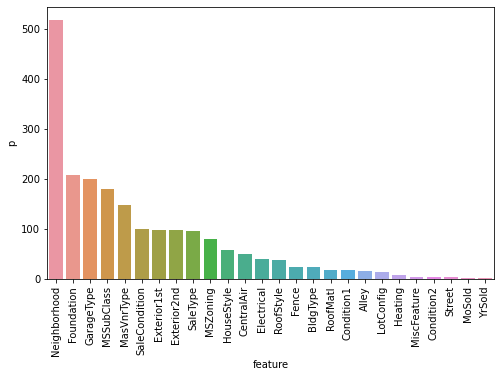

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(anova['feature'], np.log(1./anova['p']))
plt.xticks(rotation = 90)
plt.show()

<h3> Missing Values

In [32]:
#Finding missing values of the categorical columns left


missing_values = (df_train1[cat_features] == 'Missing').sum().sort_values(ascending= False)
missing_values[missing_values > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

In [33]:
missing_values = (df_test1[cat_features] == 'Missing').sum().sort_values(ascending= False)
missing_values[missing_values > 0]

MiscFeature    1408
Fence          1169
GarageType       76
MasVnrType       16
MSZoning          4
Exterior1st       1
Exterior2nd       1
SaleType          1
dtype: int64

In [34]:
#Replacin the 1 missing value in column Electrical

df_train1.loc[df_train1['Electrical'] == 'Missing','Electrical'] =df_train1['Electrical'].mode()[0]
df_test1.loc[df_test1['SaleType'] == 'Missing', 'SaleType'] = df_test1['SaleType'].mode()[0]
df_test1.loc[df_test1['Exterior2nd'] == 'Missing', 'Exterior2nd'] = df_test1['Exterior2nd'].mode()[0]
df_test1.loc[df_test1['Exterior1st'] == 'Missing', 'Exterior1st'] = df_test1['Exterior1st'].mode()[0]
df_test1.loc[df_test1['MSZoning'] == 'Missing', 'MSZoning'] = df_test1['MSZoning'].mode()[0]


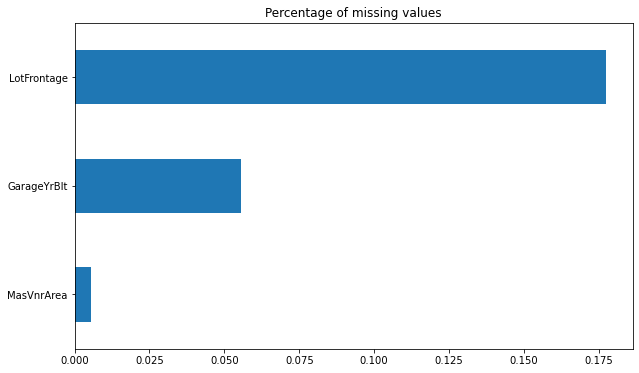

In [35]:
missing_data = df_train1.isnull().sum() / df_train1.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending = True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [38]:
#LotFrontage
df_train1['LotFrontage'] = df_train1.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test1['LotFrontage'] = df_test1.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


#GarageYrBlt
df_train1['GarageYrBlt'].fillna(0, inplace = True)
df_test1['GarageYrBlt'].fillna(0, inplace = True)


#MasVnrArea
df_train1['MasVnrArea'].fillna(0, inplace = True)
df_test1['MasVnrArea'].fillna(0, inplace = True)

In [32]:
df_train1['MasVnrType'].replace({'Missing':'None'}, inplace = True)

df_train1.loc[(df_train1['MasVnrType'] == 'None') & (df_train1['MasVnrArea'] > 1), 'MasVnrType'] = 'BrkFace'
df_train1.loc[(df_train1['MasVnrType'] == 'None') & (df_train1['MasVnrArea'] ==1), 'MasVnrArea'] = 0

for vnr_type in df_train1['MasVnrType'].unique():
    df_train1.loc[(df_train1['MasVnrType']==vnr_type) & (df_train1['MasVnrArea']==0), 'MasVnrArea'] = \
        df_train1.loc[df_train1['MasVnrType']==vnr_type]['MasVnrArea'].mean()


In [36]:
df_test1['MasVnrType'].replace({'Missing':'None'}, inplace = True)

df_test1.loc[(df_test1['MasVnrType'] == 'None') & (df_test1['MasVnrArea'] > 1), 'MasVnrType'] = 'BrkFace'
df_test1.loc[(df_test1['MasVnrType'] == 'None') & (df_test1['MasVnrArea'] ==1), 'MasVnrArea'] = 0

for vnr_type in df_test1['MasVnrType'].unique():
    df_test1.loc[(df_test1['MasVnrType']==vnr_type) & (df_test1['MasVnrArea']==0), 'MasVnrArea'] = \
        df_test1.loc[df_test1['MasVnrType']==vnr_type]['MasVnrArea'].mean()

In [40]:
missing_data = df_test1.isnull().sum()
missing_data

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

<h3> Outliers

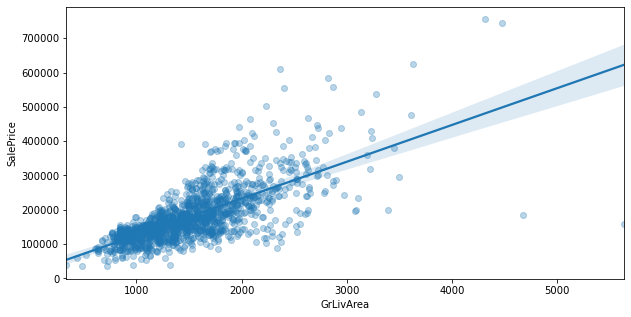

In [34]:
#check for outliers

plt.figure(figsize=(10,5))
sns.regplot(df_train1.GrLivArea, df_train1['SalePrice'], scatter_kws={'alpha':0.3})
plt.show()

In [35]:
#Remove houses above 4000 sq ft.

df_train1.drop(df_train1[df_train1['GrLivArea'] >= 4000].index, inplace=True)

In [36]:
#calculate total square feet

df_train1['TotalSF'] = df_train1['TotalBsmtSF'] + df_train1['GrLivArea']
df_train1['TotalFloorSF'] = df_train1['1stFlrSF'] + df_train1['2ndFlrSF']
df_train1['TotalPorchSF'] = df_train1['OpenPorchSF'] + df_train1['EnclosedPorch'] + df_train1['3SsnPorch'] + df_train1['ScreenPorch']

In [37]:
#creating boolean features (yes or no)

df_train1['HasBasement'] = df_train1['TotalBsmtSF'].apply(lambda x:1 if x>0 else 0)
df_train1['HasGarage'] = df_train1['GarageArea'].apply(lambda x:1 if x>0 else 0)
df_train1['HasPorch'] = df_train1['TotalPorchSF'].apply(lambda x:1 if x>0 else 0)
df_train1['HasPool'] = df_train1['PoolArea'].apply(lambda x:1 if x>0 else 0)

df_train1['WasRemodeled'] = (df_train1['YearRemodAdd'] != df_train1['YearBuilt']).astype(np.int64)
df_train1['IsNew'] = (df_train1['YearBuilt'] > 2000).astype(np.int64)
df_train1['WasCompleted'] = (df_train1['SaleCondition'] != 'Partial').astype(np.int64)

In [38]:
boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodeled', 'IsNew', 'WasCompleted']

In [39]:
#finding numerical features only
numeric_data = df_train1.select_dtypes(include = [np.number])

#finding categorical features only
categorical_data = df_train1.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 66 numerical and 25 categorical features in the training data


In [40]:
#separating boolean features
num_features = [f for f in num_features if f not in boolean_features]

In [41]:
#finding the number of bathrooms
df_train1['TotalBathrooms'] = df_train1['FullBath'] + 0.5 * df_train1['HalfBath'] + df_train1['BsmtFullBath'] + 0.5*df_train1['BsmtHalfBath']

In [42]:
#finding numerical features only
numeric_data = df_train1.select_dtypes(include = [np.number])

#finding categorical features only
categorical_data = df_train1.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

num_features = numeric_data.columns
cat_features = categorical_data.columns
num_features = [f for f in num_features if f not in boolean_features]

There are 67 numerical and 25 categorical features in the training data


In [43]:
features = num_features + ['SalePrice']
for f in features:
    df_train1.loc[:,f] = np.log1p(df_train1[f])

In [44]:
y = df_train1['SalePrice']
df_train1.drop('SalePrice', axis=1, inplace=True)
df_train1.drop('Id', axis=1, inplace=True)

model_data = pd.get_dummies(df_train1).copy()

In [45]:

model_data.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,TotalSF,TotalFloorSF,TotalPorchSF,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,TotalBathrooms,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,Fence_GdPrv,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.0

In [46]:
model_data.shape

(1456, 263)

In [47]:
from sklearn.model_selection import train_test_split

#Dividing the train data

X_train, X_test, y_train, y_test = train_test_split(model_data.copy(), y, test_size = 0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (1019, 263)
X_test: (437, 263)
y_train: (1019,)
y_test: (437,)


In [48]:
from sklearn.preprocessing import RobustScaler, StandardScaler

#Scaling the numerical features ONLY

num_features.remove('Id')
num_features.remove('SalePrice')

stdsc =StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.fit_transform(X_test[num_features])


In [49]:
from sklearn.model_selection import cross_val_score

def rsme(model, X,y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha=lasso.best_params_['alpha']
lasso=lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00896 | Test RSME: 0.00971 | alpha: 0.00010


LASSO dropped 185 of 263 features


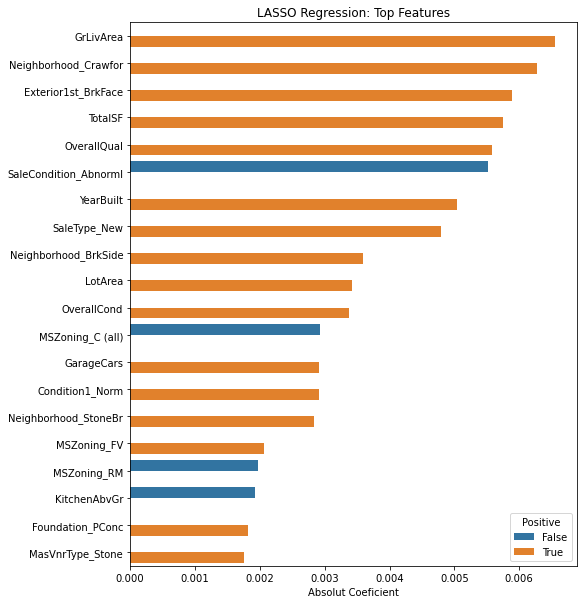

In [51]:
import seaborn as sns

#dropping not important features using Lasso

coefs = pd.DataFrame({'coefs': lasso.coef_, 'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features'.format(sum(coefs.coefs ==0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot(top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolut Coeficient')
plt.show()

In [52]:
df_train2= model_data[['GrLivArea','Neighborhood_Crawfor', 'Exterior1st_BrkFace','TotalSF','OverallQual','SaleCondition_Abnorml', 'YearBuilt', 'SaleType_New', 'Neighborhood_BrkSide','LotArea']]
df_train2.head()

,GrLivArea,Neighborhood_Crawfor,Exterior1st_BrkFace,TotalSF,OverallQual,SaleCondition_Abnorml,YearBuilt,SaleType_New,Neighborhood_BrkSide,LotArea
0,7.444833,0,0,7.850493,2.079442,0,7.602900,0,0,9.042040
1,7.141245,0,0,7.833996,1.945910,0,7.589336,0,0,9.169623
2,7.488294,0,0,7.903596,2.079442,0,7.601902,0,0,9.328212
3,7.448916,1,0,7.813592,2.079442,1,7.557995,0,0,9.164401
4,7.695758,0,0,8.114923,2.197225,0,7.601402,0,0,9.565284


In [53]:
#Bring back the original data to extract saleprice and add to our new df_train2

body = client_5e257c6d7253436b8386d986dead5ac0.get_object(Bucket='housepriceskaggle-donotdelete-pr-253ugsl323ic1h',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

df_train2['SalePrice'] = df_data_1['SalePrice']
df_train2['Id'] = df_data_1['Id']
df_train2.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,GrLivArea,Neighborhood_Crawfor,Exterior1st_BrkFace,TotalSF,OverallQual,SaleCondition_Abnorml,YearBuilt,SaleType_New,Neighborhood_BrkSide,LotArea,SalePrice,Id
0,7.444833,0,0,7.850493,2.079442,0,7.602900,0,0,9.042040,208500,1
1,7.141245,0,0,7.833996,1.945910,0,7.589336,0,0,9.169623,181500,2
2,7.488294,0,0,7.903596,2.079442,0,7.601902,0,0,9.328212,223500,3
3,7.448916,1,0,7.813592,2.079442,1,7.557995,0,0,9.164401,140000,4
4,7.695758,0,0,8.114923,2.197225,0,7.601402,0,0,9.565284,250000,5


<h3> Preprocessing

In [54]:
df_train2 = df_train2.astype('float64')


In [55]:
Y = df_train2.iloc[:, 10].values
X = df_train2.iloc[:, 0:10].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

<h3> Model

In [57]:
def models(X_train, Y_train):
    
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #XGBoost
    from xgboost import XGBClassifier
    XGB = XGBClassifier(colsample_by_level=0.9,
                       colsample_bytree = 0.8,
                       gamma = 0.99,
                       max_depth = 5,
                       min_child_weight = 1,
                       n_estimators = 10,
                       nthread = 4,
                       random_state = 2,
                       silent = True)
    XGB.fit(X_train, Y_train)
    
    
    #K-Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Support Vector
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #SVC (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Gauss
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree =DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print accuracy for each model
    print('[0]Logistic:', log.score(X_test, Y_test))
    print('[1]KNN:', knn.score(X_test, Y_test))
    print('[2]SVC Linear:', svc_lin.score(X_test, Y_test))
    print('[3]SVC RBF:', svc_rbf.score(X_test, Y_test))
    print('[4]GaussNB:', gauss.score(X_test, Y_test))
    print('[5]Decision Tree:', tree.score(X_test, Y_test))
    print('[6]Random Forest:', forest.score(X_test, Y_test))
    print('[7]XGB:', XGB.score(X_test, Y_test))


    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest, XGB

In [58]:
model = models(X_train, Y_train)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0]Logistic: 0.004576659038901602
[1]KNN: 0.002288329519450801
[2]SVC Linear: 0.006864988558352402
[3]SVC RBF: 0.011441647597254004
[4]GaussNB: 0.002288329519450801
[5]Decision Tree: 0.004576659038901602
[6]Random Forest: 0.002288329519450801
[7]XGB: 0.004576659038901602


In [59]:
pred=model[7].predict(X_test)

print(pred)

print()

#print actual values
print (Y_test)

[130000. 240000. 290000. 189000. 174000. 190000. 290000. 180000. 140000.
 100000. 240000. 290000. 240000. 240000. 239000. 207500. 140000. 230000.
 135000. 240000. 165000. 147000. 110000. 100000. 250000. 139000. 130000.
 140000. 240000. 290000. 189000. 185000. 190000. 140000. 185000. 110000.
 110000. 110000. 190000. 147000. 190000. 100000. 135000. 140000. 190000.
 130000. 115000. 139000. 135000. 176000. 110000. 250000. 240000. 140000.
 147000. 147000. 230000. 230000. 147000. 147000. 100000. 135000. 147000.
 115000. 215000. 185000. 140000. 140000. 135000. 240000. 160000. 290000.
 176000. 174000. 147000. 240000. 140000. 147000. 115000. 100000. 135000.
 185000. 176000. 115000. 140000. 139000. 135000. 110000. 100000. 110000.
 130000. 190000. 174000. 235000. 160000. 215000. 110000. 290000. 140000.
 110000. 165000. 115000. 180000. 110000. 147000. 230000. 147000. 140000.
 190000. 185000. 135000. 240000. 140000. 165000. 250000. 110000. 178000.
 125000. 180000. 100000. 147000. 165000. 147000. 14